<a href="https://colab.research.google.com/github/TruflleBlack/Predictive_Analytics_Depression/blob/main/Predictive_Analytics_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

## Download Dataset

In [1]:
! kaggle datasets download -d diegobabativa/depression

depression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
! unzip depression.zip -d .

Archive:  depression.zip
replace ./b_depressed.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./b_depressed.csv       


# Data Understanding

## Importing Python Modules

In [3]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
# Visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import resample 
from sklearn.preprocessing import StandardScaler
# modelling
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Load Data in a Dataframe using pandas

In [5]:
df = pd.read_csv("b_depressed.csv")
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [6]:
df.iloc[1]

Survey_id                     747.0
Ville_id                       57.0
sex                             1.0
Age                            23.0
Married                         1.0
Number_children                 3.0
education_level                 8.0
total_members                   5.0
gained_asset             28912201.0
durable_asset            22861940.0
save_asset               23399979.0
living_expenses          26692283.0
other_expenses           28203066.0
incoming_salary                 0.0
incoming_own_farm               0.0
incoming_business               0.0
incoming_no_business            0.0
incoming_agricultural    30028818.0
farm_expenses            31363432.0
labor_primary                   0.0
lasting_investment       28411718.0
no_lasting_investmen     28292707.0
depressed                       1.0
Name: 1, dtype: float64

## Variable Description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

## Count the number of missing values in each column

In [8]:
df.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [9]:
data=df.dropna(axis=0)

In [10]:
data.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [11]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Pandas DataFrame - Using value_counts()

In [12]:
data.no_lasting_investmen.value_counts()

28292707.0    425
11121784.0      3
3558971.0       3
20019212.0      3
60724945.0      3
             ... 
14723019.0      1
20464084.0      1
25046258.0      1
24094234.0      1
13012488.0      1
Name: no_lasting_investmen, Length: 939, dtype: int64

## Displays Descriptive Data Statistics

In [13]:
data.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,...,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1409.000000,1.409000e+03,1.409000e+03,1409.000000
mean,715.808375,76.481902,0.918382,34.733854,0.774308,2.904897,8.697658,4.996451,3.360588e+07,2.707096e+07,...,0.176011,0.254081,0.109297,0.264017,3.457400e+07,3.555012e+07,0.209368,3.300612e+07,3.360385e+07,0.166785
std,413.394322,66.722340,0.273879,13.800712,0.418186,1.872585,2.913673,1.772778,2.007839e+07,1.804276e+07,...,0.380965,0.435498,0.312123,0.440965,2.091860e+07,2.126744e+07,0.407002,2.114974e+07,2.160228e+07,0.372916
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,356.000000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.312976e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.295536e+07,2.239928e+07,0.000000,2.010056e+07,2.064203e+07,0.000000
50%,717.000000,57.000000,1.000000,31.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1075.000000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.634528e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.399778e+07,0.000000,3.978445e+07,4.151762e+07,0.000000
max,1429.000000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


## Delete columns that are not needed

In [14]:
Depression = data[~(data.no_lasting_investmen.isnull())]
Depression = data.drop(['Survey_id','Ville_id'],axis=1)

In [15]:
Depression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1409 non-null   int64  
 1   Age                    1409 non-null   int64  
 2   Married                1409 non-null   int64  
 3   Number_children        1409 non-null   int64  
 4   education_level        1409 non-null   int64  
 5   total_members          1409 non-null   int64  
 6   gained_asset           1409 non-null   int64  
 7   durable_asset          1409 non-null   int64  
 8   save_asset             1409 non-null   int64  
 9   living_expenses        1409 non-null   int64  
 10  other_expenses         1409 non-null   int64  
 11  incoming_salary        1409 non-null   int64  
 12  incoming_own_farm      1409 non-null   int64  
 13  incoming_business      1409 non-null   int64  
 14  incoming_no_business   1409 non-null   int64  
 15  inco

In [16]:
Depression.depressed.value_counts()

0    1174
1     235
Name: depressed, dtype: int64

In [17]:
Depression.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


## EDA

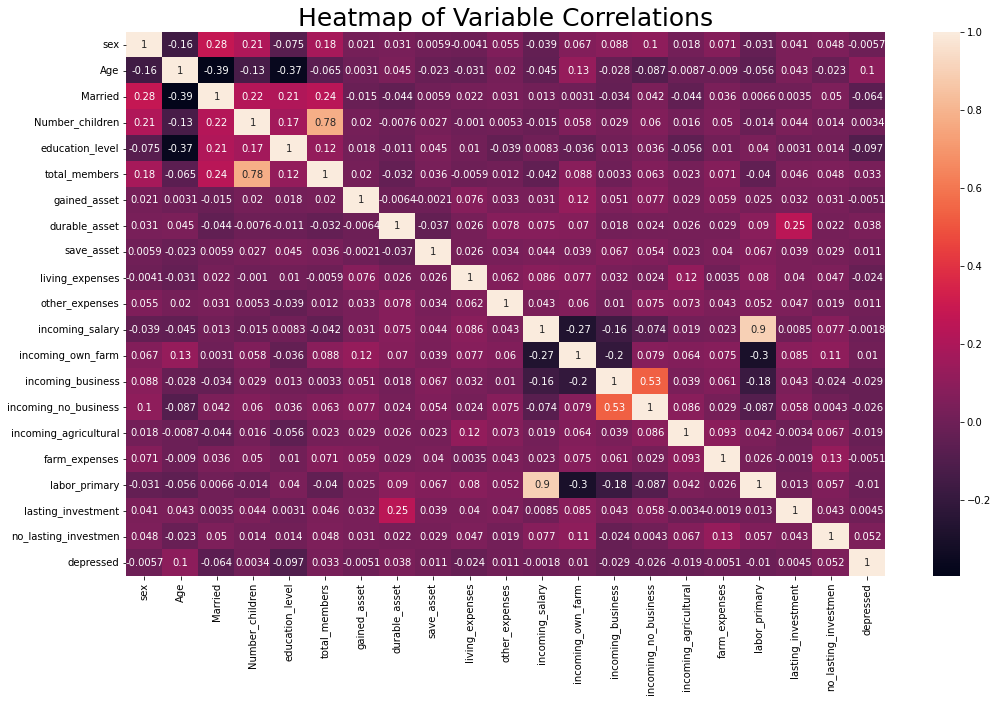

In [18]:
plt.figure(figsize=(17,10))
sns.heatmap(Depression.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()

## View Numerical Distribution

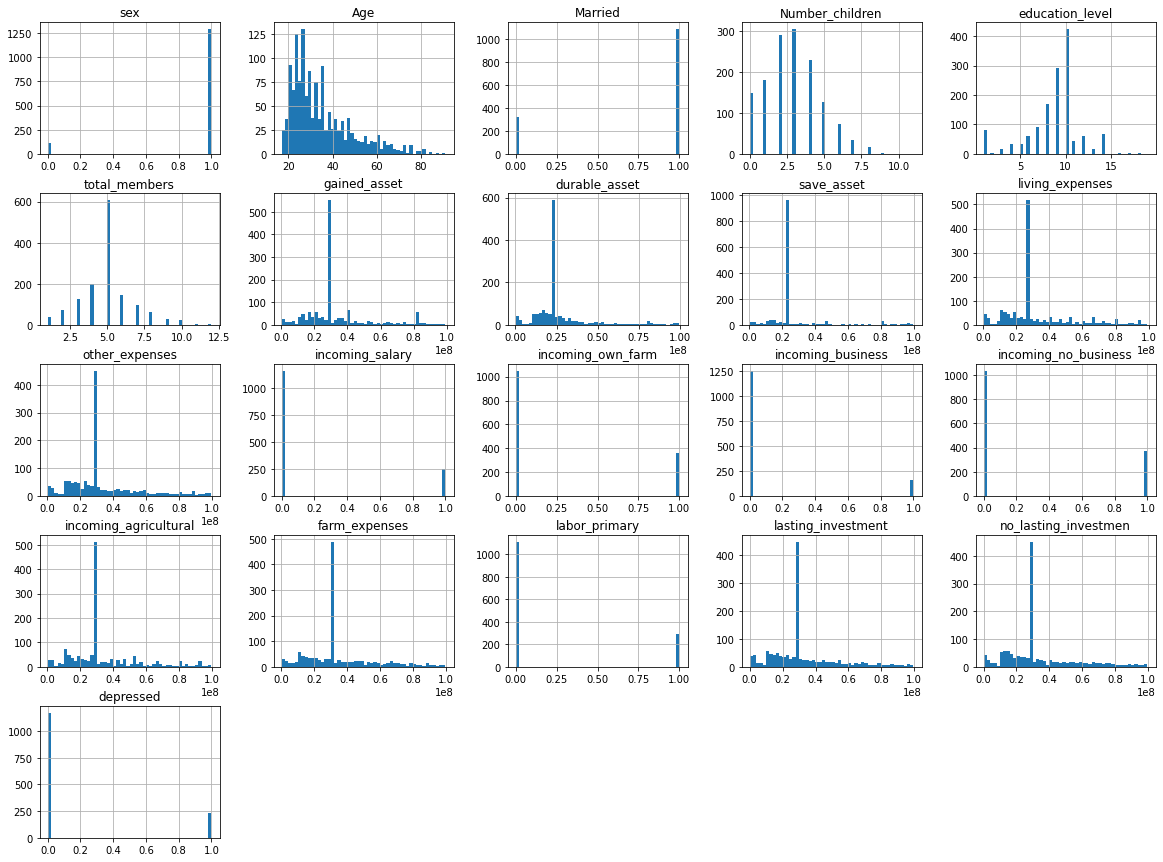

In [19]:
Depression.hist(bins=50, figsize=(20,15))
plt.show()

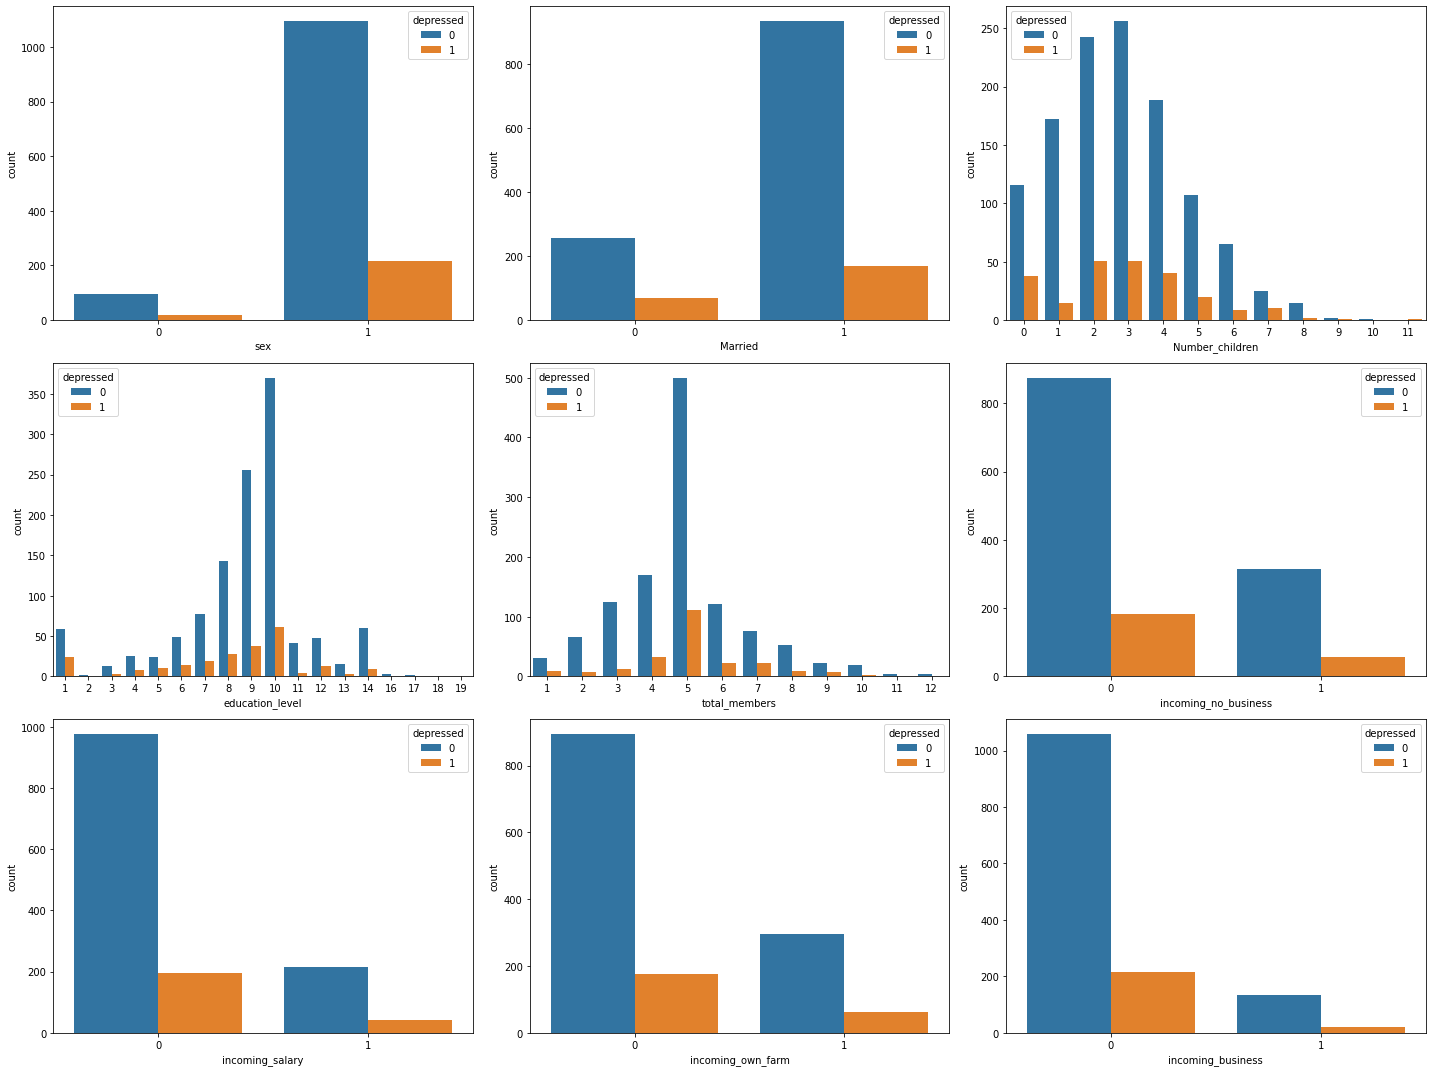

In [20]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=df)
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=df)
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=df)

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=df)
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=df)
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df)

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=df)
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df)
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=df)

plt.tight_layout()
plt.show()

# Data Preparation

In [21]:
Depression['Number_children'] = Depression['Number_children'].apply(lambda x: str(x)+' children')
Depression['education_level'] = Depression['education_level'].apply(lambda x: str(x)+' education level')
Depression['total_members'] = Depression['total_members'].apply(lambda x: str(x)+' family members')
Depression.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4 children,10 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3 children,8 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3 children,9 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2 children,10 education level,4 family members,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4 children,10 education level,6 family members,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [22]:
temp = pd.get_dummies(Depression['Number_children'],drop_first=False)
Depression = pd.concat([Depression,temp],axis=1)
Depression.drop('Number_children',axis=1,inplace=True)

temp = pd.get_dummies(Depression['education_level'],drop_first=False)
Depression = pd.concat([Depression,temp],axis=1)
Depression.drop('education_level',axis=1,inplace=True)

temp = pd.get_dummies(Depression['total_members'],drop_first=False)
Depression = pd.concat([Depression,temp],axis=1)
Depression.drop('total_members',axis=1,inplace=True)

In [23]:
Depression.head()

,sex,Age,Married,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,...,11 family members,12 family members,2 family members,3 family members,4 family members,5 family members,6 family members,7 family members,8 family members,9 family members
0,1,28,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,23,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,22,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27,1,52667108,19698904,49647648,397715,44042267,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,59,0,82606287,17352654,23399979,80877619,74503502,1,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
X = Depression.drop('depressed',axis=1)
y = Depression['depressed']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [25]:
X_train.head()

,sex,Age,Married,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,...,11 family members,12 family members,2 family members,3 family members,4 family members,5 family members,6 family members,7 family members,8 family members,9 family members
209,1,27,1,20651573,1601537,23399979,16682677,10602175,0,1,...,0,0,0,0,0,1,0,0,0,0
539,1,26,1,94314049,38148611,23399979,23489211,18337599,0,1,...,0,0,0,0,1,0,0,0,0,0
628,1,25,1,28912201,13565018,23399979,12812296,15935293,1,0,...,0,0,0,0,1,0,0,0,0,0
1214,1,63,0,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
113,1,45,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
y_train.head()

209     0
539     0
628     0
1214    0
113     0
Name: depressed, dtype: int64

In [27]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

## 1. Setting up dataframes for model analysis

In [28]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['ExtraTrees', 'RandomForest', 'DecisionTree', 'AdaBoost'])

## 2. Model Development with Extra Trees

In [29]:
ET = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
ET.fit(X_train, y_train)

models.loc['train_mse','ET'] = mean_squared_error(y_pred = ET.predict(X_train), y_true=y_train)

In [30]:
ET_pred = ET.predict(X_test)

In [31]:
accuracy_score(y_test, ET_pred)

0.8368794326241135

In [32]:
ET_cr = classification_report(y_test, ET_pred, output_dict=True)
pd.DataFrame(ET_cr).transpose()

,precision,recall,f1-score,support
0,0.862408,0.964286,0.910506,364.000000
1,0.187500,0.050847,0.080000,59.000000
accuracy,0.836879,0.836879,0.836879,0.836879
macro avg,0.524954,0.507567,0.495253,423.000000
weighted avg,0.768272,0.836879,0.794667,423.000000


## 3. Model Development with Random Forest

In [33]:
RF = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)         

In [34]:
RF_pred = RF.predict(X_test)

In [35]:
accuracy_score(y_test, RF_pred)

0.851063829787234

In [36]:
RF_cr = classification_report(y_test, RF_pred, output_dict=True)
pd.DataFrame(RF_cr).transpose()

,precision,recall,f1-score,support
0,0.862651,0.983516,0.919127,364.000000
1,0.250000,0.033898,0.059701,59.000000
accuracy,0.851064,0.851064,0.851064,0.851064
macro avg,0.556325,0.508707,0.489414,423.000000
weighted avg,0.777198,0.851064,0.799254,423.000000


## 4. Model Development with Decision Tree

In [37]:
DT = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
DT.fit(X_train, y_train)
models.loc['train_mse','DecisionTree'] = mean_squared_error(y_pred=DT.predict(X_train), y_true=y_train)

In [38]:
DT_pred = DT.predict(X_test)

In [39]:
accuracy_score(y_test, DT_pred)

0.7115839243498818

In [40]:
DT_cr = classification_report(y_test, DT_pred, output_dict=True)
pd.DataFrame(DT_cr).transpose()

,precision,recall,f1-score,support
0,0.860119,0.793956,0.825714,364.000000
1,0.137931,0.203390,0.164384,59.000000
accuracy,0.711584,0.711584,0.711584,0.711584
macro avg,0.499025,0.498673,0.495049,423.000000
weighted avg,0.759388,0.711584,0.733472,423.000000


### 5. Model Development with Adaptive boosting

In [41]:
AB = AdaBoostClassifier(n_estimators=100,  random_state=0)
AB.fit(X_train, y_train)
models.loc['train_mse','AdaBoost'] = mean_squared_error(y_pred=AB.predict(X_train), y_true=y_train)

In [42]:
AB_pred = AB.predict(X_test)

In [43]:
accuracy_score(y_test, AB_pred)

0.8274231678486997

In [44]:
AB_cr = classification_report(y_test, AB_pred, output_dict=True)
pd.DataFrame(AB_cr).transpose()

,precision,recall,f1-score,support
0,0.861042,0.953297,0.904824,364.000000
1,0.150000,0.050847,0.075949,59.000000
accuracy,0.827423,0.827423,0.827423,0.827423
macro avg,0.505521,0.502072,0.490387,423.000000
weighted avg,0.761866,0.827423,0.789213,423.000000


## 6. Enter the model classification report results in the dataframe

In [45]:
metrics = pd.DataFrame({'accuracy' : [RF_cr['accuracy'], ET_cr['accuracy'], DT_cr['accuracy'], AB_cr['accuracy']],
                        'f1-score_0' : [RF_cr['0']['f1-score'],ET_cr['0']['f1-score'], DT_cr['0']['f1-score'], AB_cr['0']['f1-score']],
                        'precision_0' : [RF_cr['0']['precision'],ET_cr['0']['precision'], DT_cr['0']['precision'], AB_cr['0']['precision']],
                        'recall_0' : [RF_cr['0']['recall'],ET_cr['0']['recall'], DT_cr['0']['recall'], AB_cr['0']['recall']],
                        'f1-score_1' : [RF_cr['1']['f1-score'],ET_cr['1']['f1-score'], DT_cr['1']['f1-score'], AB_cr['1']['f1-score']],
                        'precision_1' : [RF_cr['1']['precision'],ET_cr['1']['precision'], DT_cr['1']['precision'], AB_cr['1']['precision']],
                        'recall_1' : [RF_cr['1']['recall'],ET_cr['1']['recall'], DT_cr['1']['recall'], AB_cr['1']['recall']]},
                        index=['RandomForest','ExtraTrees','DecisionTree','AdaBoost'])
multiheader = [('','accuracy'),
               ('0', 'f1-score'),
               ('0', 'precision'),
               ('0', 'recall'),
               ('1', 'f1-score'),
               ('1', 'precision'),
               ('1', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
metrics

0                             1            \
              accuracy  f1-score precision    recall  f1-score precision   
RandomForest  0.851064  0.919127  0.862651  0.983516  0.059701  0.250000   
ExtraTrees    0.836879  0.910506  0.862408  0.964286  0.080000  0.187500   
DecisionTree  0.711584  0.825714  0.860119  0.793956  0.164384  0.137931   
AdaBoost      0.827423  0.904824  0.861042  0.953297  0.075949  0.150000   

                        
                recall  
RandomForest  0.033898  
ExtraTrees    0.050847  
DecisionTree  0.203390  
AdaBoost      0.050847

From the modeling conclusions above, the random forest model has the highest accuracy. 

# Model evaluation

In [46]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'max_depth':[3,5,10,12,15],
         'min_samples_leaf':[60,70,80,90,100,120,130],
         'n_estimators':[200], 
         'max_features': [0.05,0.1,0.15,0.2],
         'criterion': ["gini"]}

grid_search = GridSearchCV(param_grid=params,estimator=Model,n_jobs=-1,verbose=1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 10, 12, 15],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [60, 70, 80, 90, 100, 120, 130],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [47]:
GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 10, 12, 15],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [60, 70, 80, 90, 100, 120, 130],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 10, 12, 15],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [60, 70, 80, 90, 100, 120, 130],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [48]:
Model_best = grid_search.best_estimator_

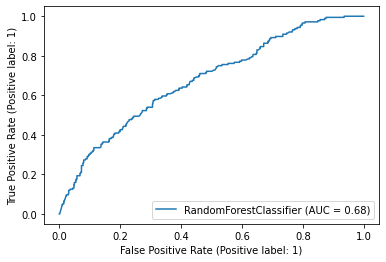

Accuracy:  0.821501014198783
Recall:  0.0


In [49]:
plot_roc_curve(Model_best,X_train,y_train)
plt.show()
y_train_pred = Model_best.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))

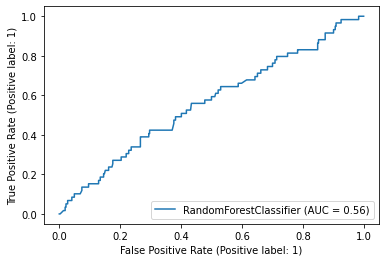

Accuracy:  0.8605200945626478
Recall:  0.0


In [50]:
plot_roc_curve(Model_best,X_test,y_test)
plt.show()
y_test_pred = Model_best.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))

In [52]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [53]:
Feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance.set_index('Feature',inplace=True)
Feature_importance.head()

,Importance
Feature,
no_lasting_investmen,0.073370
lasting_investment,0.065184
living_expenses,0.063095
Age,0.059431
incoming_agricultural,0.059282


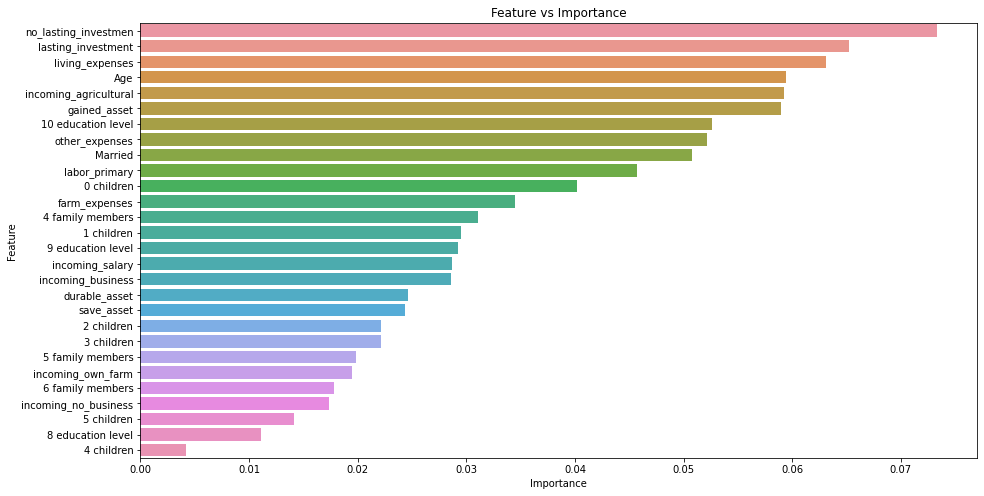

In [54]:
Feature_importance = Feature_importance[Feature_importance.Importance!=0]
plt.figure(figsize=(15,8))
sns.barplot(y=Feature_importance.index,x=Feature_importance.Importance)
plt.title('Feature vs Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()